In [1]:
import numpy as num
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score 
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("UNR-IDD.csv")
df.head()

Switch ID Port Number  Received Packets  Received Bytes  \
0  of:000000000000000c     Port#:1               132            9181   
1  of:000000000000000c     Port#:2               187         6304498   
2  of:000000000000000c     Port#:3               235         6311567   
3  of:000000000000000c     Port#:4                59            7878   
4  of:000000000000000a     Port#:1               188         6304547   

   Sent Bytes  Sent Packets  Port alive Duration (S)  Packets Rx Dropped  \
0     6311853           238                       46                   0   
1       15713           171                       46                   0   
2        8030            58                       46                   0   
3       16439           182                       46                   0   
4       16497           183                       46                   0   

   Packets Tx Dropped  Packets Rx Errors  ...  Unknown Load/Latest  \
0                   0                  0  ...                    0   
1                   0                  0  ...                    0   
2                   0                  0  ...                    0   
3                   0                  0  ...                    0   
4                   0                  0  ...                    0   

   Latest bytes counter  is_valid  Table ID  Active Flow Entries  \
0                     0      True         0                    9   
1                     0      True         0                    9   
2                     0      True         0                    9   
3                     0      True         0                    9   
4                     0      True         0                    7   

   Packets Looked Up  Packets Matched  Max Size    Label  Binary Label  
0                767              688        -1  TCP-SYN        Attack  
1                767              688        -1  TCP-SYN        Attack  
2                767              688        -1  TCP-SYN        Attack  
3                767              688        -1  TCP-SYN        Attack  
4                489              403        -1  TCP-SYN        Attack  

[5 rows x 34 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

In [4]:
df['Label'].unique()

array(['TCP-SYN', 'Blackhole', 'Diversion', 'Overflow', 'Normal',
       'PortScan'], dtype=object)

In [5]:
df.shape

(37411, 34)

In [6]:
data=df.drop(['Packets Rx Dropped','Packets Tx Dropped', 'Packets Rx Errors', 'Packets Tx Errors', 'Delta Packets Rx Dropped', ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors', 'Delta Packets Tx Errors', 'is_valid', 'Table ID', 'Max Size', 'Delta Port alive Duration (S)'], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Switch ID                37411 non-null  object
 1   Port Number              37411 non-null  object
 2   Received Packets         37411 non-null  int64 
 3   Received Bytes           37411 non-null  int64 
 4   Sent Bytes               37411 non-null  int64 
 5   Sent Packets             37411 non-null  int64 
 6   Port alive Duration (S)  37411 non-null  int64 
 7   Delta Received Packets   37411 non-null  int64 
 8   Delta Received Bytes     37411 non-null  int64 
 9   Delta Sent Bytes         37411 non-null  int64 
 10  Delta Sent Packets       37411 non-null  int64 
 11  Connection Point         37411 non-null  int64 
 12  Total Load/Rate          37411 non-null  int64 
 13  Total Load/Latest        37411 non-null  int64 
 14  Unknown Load/Rate        37411 non-nul

In [8]:
data = pd.get_dummies(df, columns = ['Switch ID', 'Port Number', 'Binary Label'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Received Packets               37411 non-null  int64 
 1   Received Bytes                 37411 non-null  int64 
 2   Sent Bytes                     37411 non-null  int64 
 3   Sent Packets                   37411 non-null  int64 
 4   Port alive Duration (S)        37411 non-null  int64 
 5   Packets Rx Dropped             37411 non-null  int64 
 6   Packets Tx Dropped             37411 non-null  int64 
 7   Packets Rx Errors              37411 non-null  int64 
 8   Packets Tx Errors              37411 non-null  int64 
 9   Delta Received Packets         37411 non-null  int64 
 10  Delta Received Bytes           37411 non-null  int64 
 11  Delta Sent Bytes               37411 non-null  int64 
 12  Delta Sent Packets             37411 non-null  int64 
 13  D

In [10]:
X = data.drop('Label',axis=1).values
y = df['Label'].values
print(X)

[[132 9181 6311853 ... 0 1 0]
 [187 6304498 15713 ... 0 1 0]
 [235 6311567 8030 ... 0 1 0]
 ...
 [1042 25252012 7856976 ... 0 1 0]
 [149012 14360115 29509 ... 0 1 0]
 [228 30377 25258600 ... 0 1 0]]


In [11]:
print(y)

['TCP-SYN' 'TCP-SYN' 'TCP-SYN' ... 'PortScan' 'PortScan' 'PortScan']


In [12]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(29928, 48)
(7483, 48)
(29928,)
(7483,)


In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components= 15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = knn.predict(X_test)
print (y_pred)
print (y_test)

['PortScan' 'Blackhole' 'Diversion' ... 'TCP-SYN' 'PortScan' 'Diversion']
['PortScan' 'Blackhole' 'Diversion' ... 'TCP-SYN' 'TCP-SYN' 'Diversion']


In [17]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

1.0
0.9139382600561272


In [18]:
print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ", accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

   Blackhole       0.96      0.96      0.96      1603
   Diversion       1.00      0.99      0.99      1151
      Normal       1.00      1.00      1.00       716
    Overflow       0.77      0.65      0.70       213
    PortScan       0.87      0.88      0.88      1925
     TCP-SYN       0.85      0.86      0.86      1875

    accuracy                           0.91      7483
   macro avg       0.91      0.89      0.90      7483
weighted avg       0.91      0.91      0.91      7483

Validation Accuracy:  0.9139382600561272
None


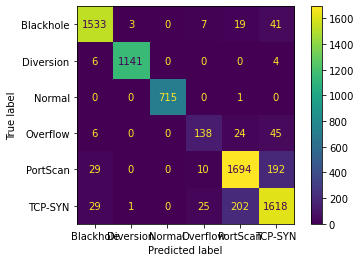

In [19]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

In [20]:
train_scores = []
test_scores = []
neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for neighbour in neighbours:
  knn = KNeighborsClassifier(n_neighbors= neighbour)
  knn.fit(X_train, y_train)
  train_pred = knn.predict(X_train)
  test_pred = knn.predict (X_test)
  train_score = accuracy_score (y_train, train_pred)
  test_score = accuracy_score(y_test, test_pred)
  train_scores.append (train_score)
  test_scores.append (test_score)

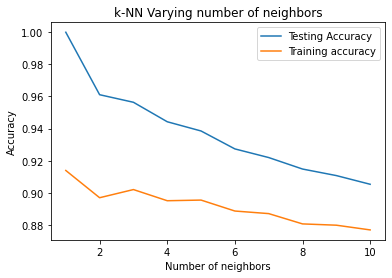

In [21]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, train_scores, label='Testing Accuracy')
plt.plot(neighbours, test_scores, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [22]:
logisticRegression =  LogisticRegression(random_state = 0)
logisticRegression.fit(X_train, y_train)

C:\Users\megha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [23]:
y_pred = logisticRegression.predict(X_test)

print (y_pred)

['PortScan' 'Blackhole' 'Diversion' ... 'TCP-SYN' 'PortScan' 'Diversion']


In [24]:
print (logisticRegression.score(X_train, y_train))
print (logisticRegression.score(X_test, y_test))

0.838545843357391
0.8425765067486303


In [25]:
print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ",accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

   Blackhole       0.95      0.94      0.95      1603
   Diversion       1.00      0.96      0.98      1151
      Normal       1.00      1.00      1.00       716
    Overflow       0.89      0.23      0.37       213
    PortScan       0.88      0.61      0.72      1925
     TCP-SYN       0.65      0.93      0.76      1875

    accuracy                           0.84      7483
   macro avg       0.90      0.78      0.80      7483
weighted avg       0.87      0.84      0.84      7483

Validation Accuracy:  0.8425765067486303
None


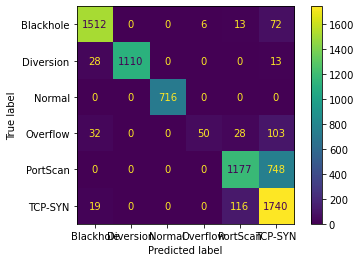

In [26]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticRegression.classes_)
disp.plot()
plt.show()

In [29]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import export_graphviz as draw_tree
from sklearn import tree
from sklearn.datasets import load_iris
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
classifier = DTC()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = classifier.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))
print (print("Validation Accuracy: ",accuracy_score(y_test, y_pred)))

Accuracy test set:  0.9335827876520112
None
Precision test set:  0.9335827876520112
None
Recall test set:  0.9335827876520112
None
F-score test set:  0.9335827876520112
None
              precision    recall  f1-score   support

   Blackhole       0.97      0.98      0.98      1603
   Diversion       0.99      0.98      0.98      1151
      Normal       1.00      1.00      1.00       716
    Overflow       0.85      0.81      0.83       213
    PortScan       0.89      0.90      0.90      1925
     TCP-SYN       0.89      0.89      0.89      1875

    accuracy                           0.93      7483
   macro avg       0.93      0.93      0.93      7483
weighted avg       0.93      0.93      0.93      7483

Validation Accuracy:  0.9335827876520112
None


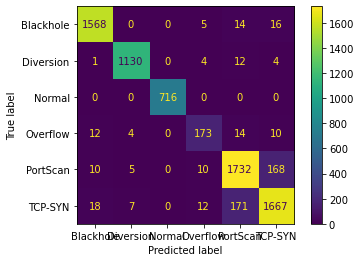

In [32]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()


In [33]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)


In [34]:
pca = PCA(n_components= 15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

In [35]:
y_pred = classifier.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))
print (print("Validation Accuracy: ",accuracy_score(y_test, y_pred)))

Accuracy test set:  0.839636509421355
None
Precision test set:  0.839636509421355
None
Recall test set:  0.839636509421355
None
F-score test set:  0.839636509421355
None
              precision    recall  f1-score   support

   Blackhole       0.96      0.94      0.95      1603
   Diversion       1.00      0.97      0.98      1151
      Normal       1.00      1.00      1.00       716
    Overflow       0.96      0.23      0.38       213
    PortScan       0.92      0.58      0.71      1925
     TCP-SYN       0.63      0.96      0.76      1875

    accuracy                           0.84      7483
   macro avg       0.91      0.78      0.80      7483
weighted avg       0.88      0.84      0.83      7483

Validation Accuracy:  0.839636509421355
None


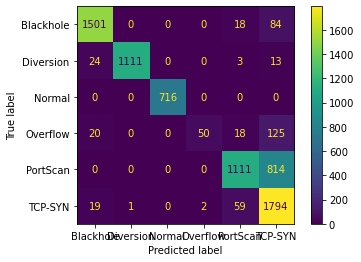

In [36]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

[0.8408179631114675, 0.7673082063619353, 0.8377439187383052, 0.6426423416198878]


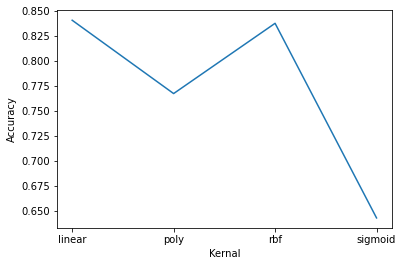

In [37]:

list_kernals=['linear', 'poly', 'rbf', 'sigmoid' ]


list_accuracy=[]

for row in list_kernals:
    

    classifier = SVC(kernel = row)
    
 
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    train_data_predictions = classifier.predict(X_train)
    
    list_accuracy.append(accuracy_score(y_train, train_data_predictions))


print(list_accuracy)

plt.plot (list_kernals, list_accuracy)
plt.xlabel('Kernal')
plt.ylabel('Accuracy')
plt.show()
